In [36]:
import pandas as pd
df = pd.read_csv('diabetes_prediction_dataset.csv')

In [37]:
df.head()

,id,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,Female,80.0,0,1,never,25.19,6.6,140,0
1,2,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,3,Male,28.0,0,0,never,27.32,5.7,158,0
3,4,Female,36.0,0,0,current,23.45,5.0,155,0
4,5,Male,76.0,1,1,current,20.14,4.8,155,0


In [139]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes', 'smoking_history_No Info',
       'smoking_history_current', 'smoking_history_ever',
       'smoking_history_former', 'smoking_history_never',
       'smoking_history_not current'],
      dtype='object')

In [140]:
cols_cat = ['gender', 'smoking_history_No Info',
       'smoking_history_current', 'smoking_history_ever',
       'smoking_history_former', 'smoking_history_never',
       'smoking_history_not current' ]
df[cols_cat].head()

,gender,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0,False,False,False,False,True,False
1,0,True,False,False,False,False,False
2,1,False,False,False,False,True,False
3,0,False,True,False,False,False,False
4,1,False,True,False,False,False,False


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   100000 non-null  int64  
 1   gender               100000 non-null  object 
 2   age                  100000 non-null  float64
 3   hypertension         100000 non-null  int64  
 4   heart_disease        100000 non-null  int64  
 5   smoking_history      100000 non-null  object 
 6   bmi                  100000 non-null  float64
 7   HbA1c_level          100000 non-null  float64
 8   blood_glucose_level  100000 non-null  int64  
 9   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 7.6+ MB


In [39]:
df.diabetes.value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

In [40]:
df = df.drop(columns={'id'})
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [41]:
import warnings
warnings.filterwarnings('ignore')
df.gender.replace({'Female': 0, 'Male': 1, 'Other': 3}, inplace=True)
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,never,25.19,6.6,140,0
1,0,54.0,0,0,No Info,27.32,6.6,80,0
2,1,28.0,0,0,never,27.32,5.7,158,0
3,0,36.0,0,0,current,23.45,5.0,155,0
4,1,76.0,1,1,current,20.14,4.8,155,0


<Axes: xlabel='smoking_history', ylabel='count'>

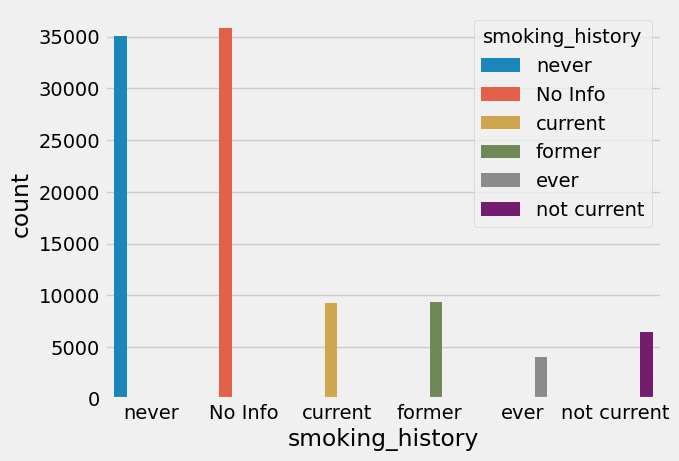

In [42]:
sns.countplot(data=df, x='smoking_history', hue='smoking_history')

In [43]:
df = pd.get_dummies(df, columns=['smoking_history'])
df.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0,80.0,0,1,25.19,6.6,140,0,False,False,False,False,True,False
1,0,54.0,0,0,27.32,6.6,80,0,True,False,False,False,False,False
2,1,28.0,0,0,27.32,5.7,158,0,False,False,False,False,True,False
3,0,36.0,0,0,23.45,5.0,155,0,False,True,False,False,False,False
4,1,76.0,1,1,20.14,4.8,155,0,False,True,False,False,False,False


In [44]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes', 'smoking_history_No Info',
       'smoking_history_current', 'smoking_history_ever',
       'smoking_history_former', 'smoking_history_never',
       'smoking_history_not current'],
      dtype='object')

In [45]:
df[['smoking_history_No Info',
       'smoking_history_current', 'smoking_history_ever',
       'smoking_history_former', 'smoking_history_never',
       'smoking_history_not current']].head()

,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,False,False,False,False,True,False
1,True,False,False,False,False,False
2,False,False,False,False,True,False
3,False,True,False,False,False,False
4,False,True,False,False,False,False


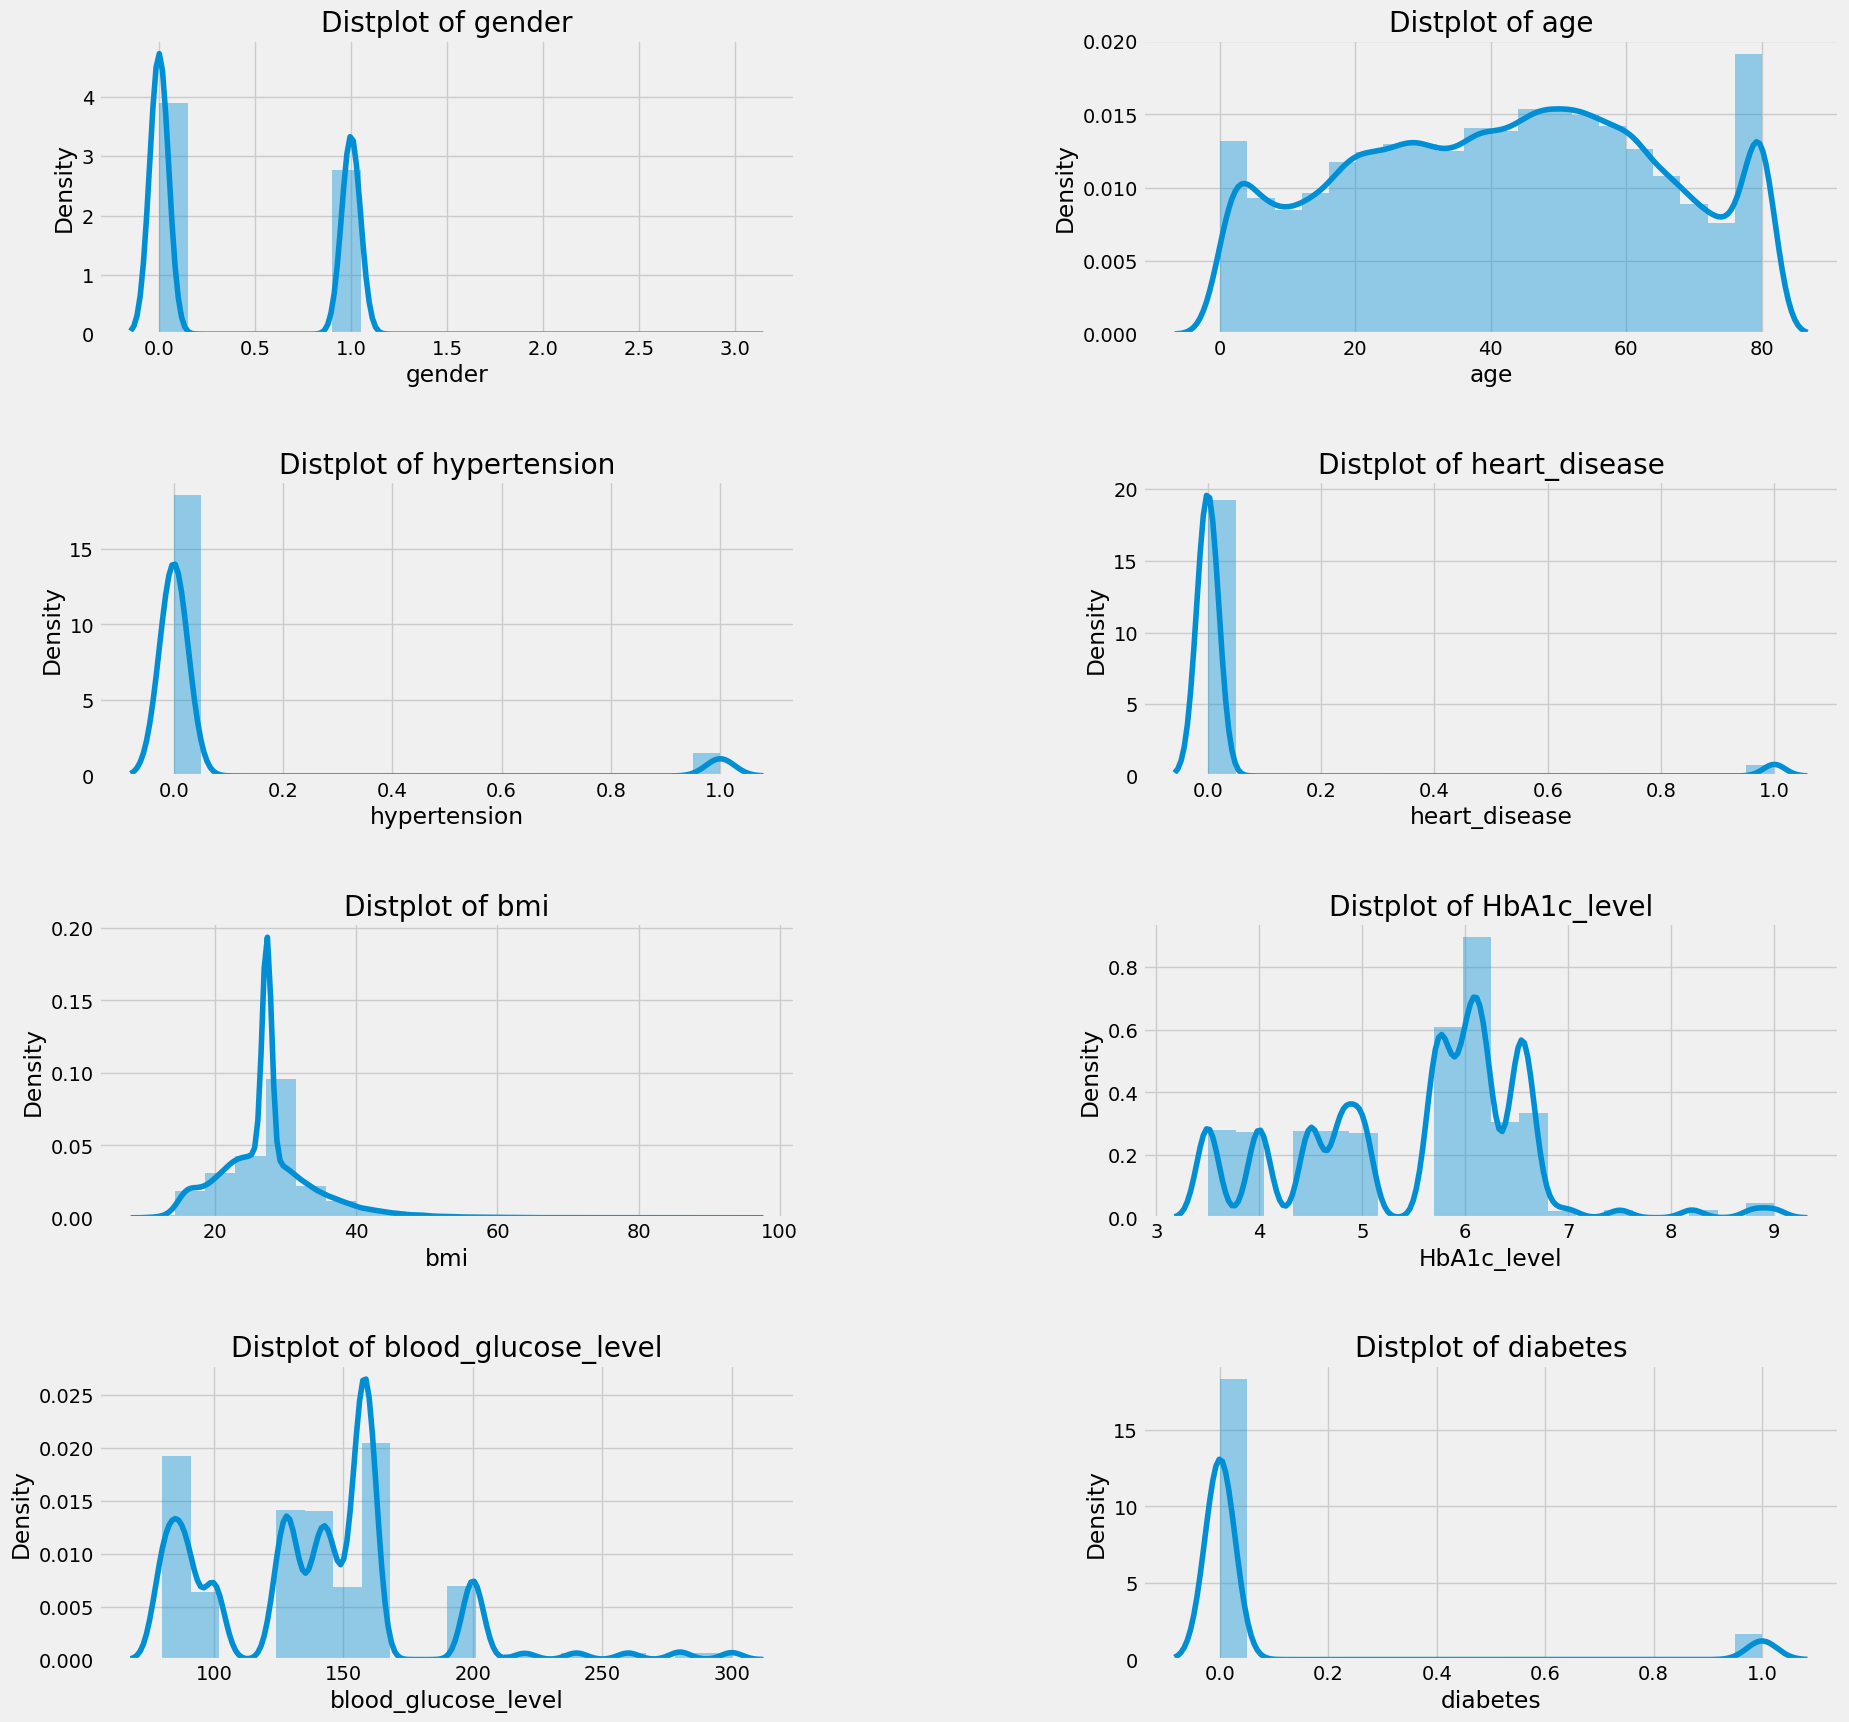

In [48]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

cols = ['gender', 'age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes']
plt.style.use('fivethirtyeight')
plt.figure(1, figsize = (20, 20))
n = 0
for x in cols:
    n += 1
    plt.subplot(4, 2, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(df[x], bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

#### Tổng quan về bộ dữ liệu:
- Đa phần các bệnh nhân không bị huyết áp cao
- Các bệnh nhân có vấn đề về tim mạch chiếm số lượng thấp
- HbA1c có mức độ chủ yếu từ 6-7
- Hầu hết các bệnh nhân đều chưa bao giờ hút thuốc hoặc chưa có thông tin về tiền xử hút thuốc lá của bệnh nhân.
- Chỉ số BMI của bệnh nhân chủ yếu trong khoảng 20-35
- Mức đường huyết chủ yếu trong khoảng 130-160

## EDA

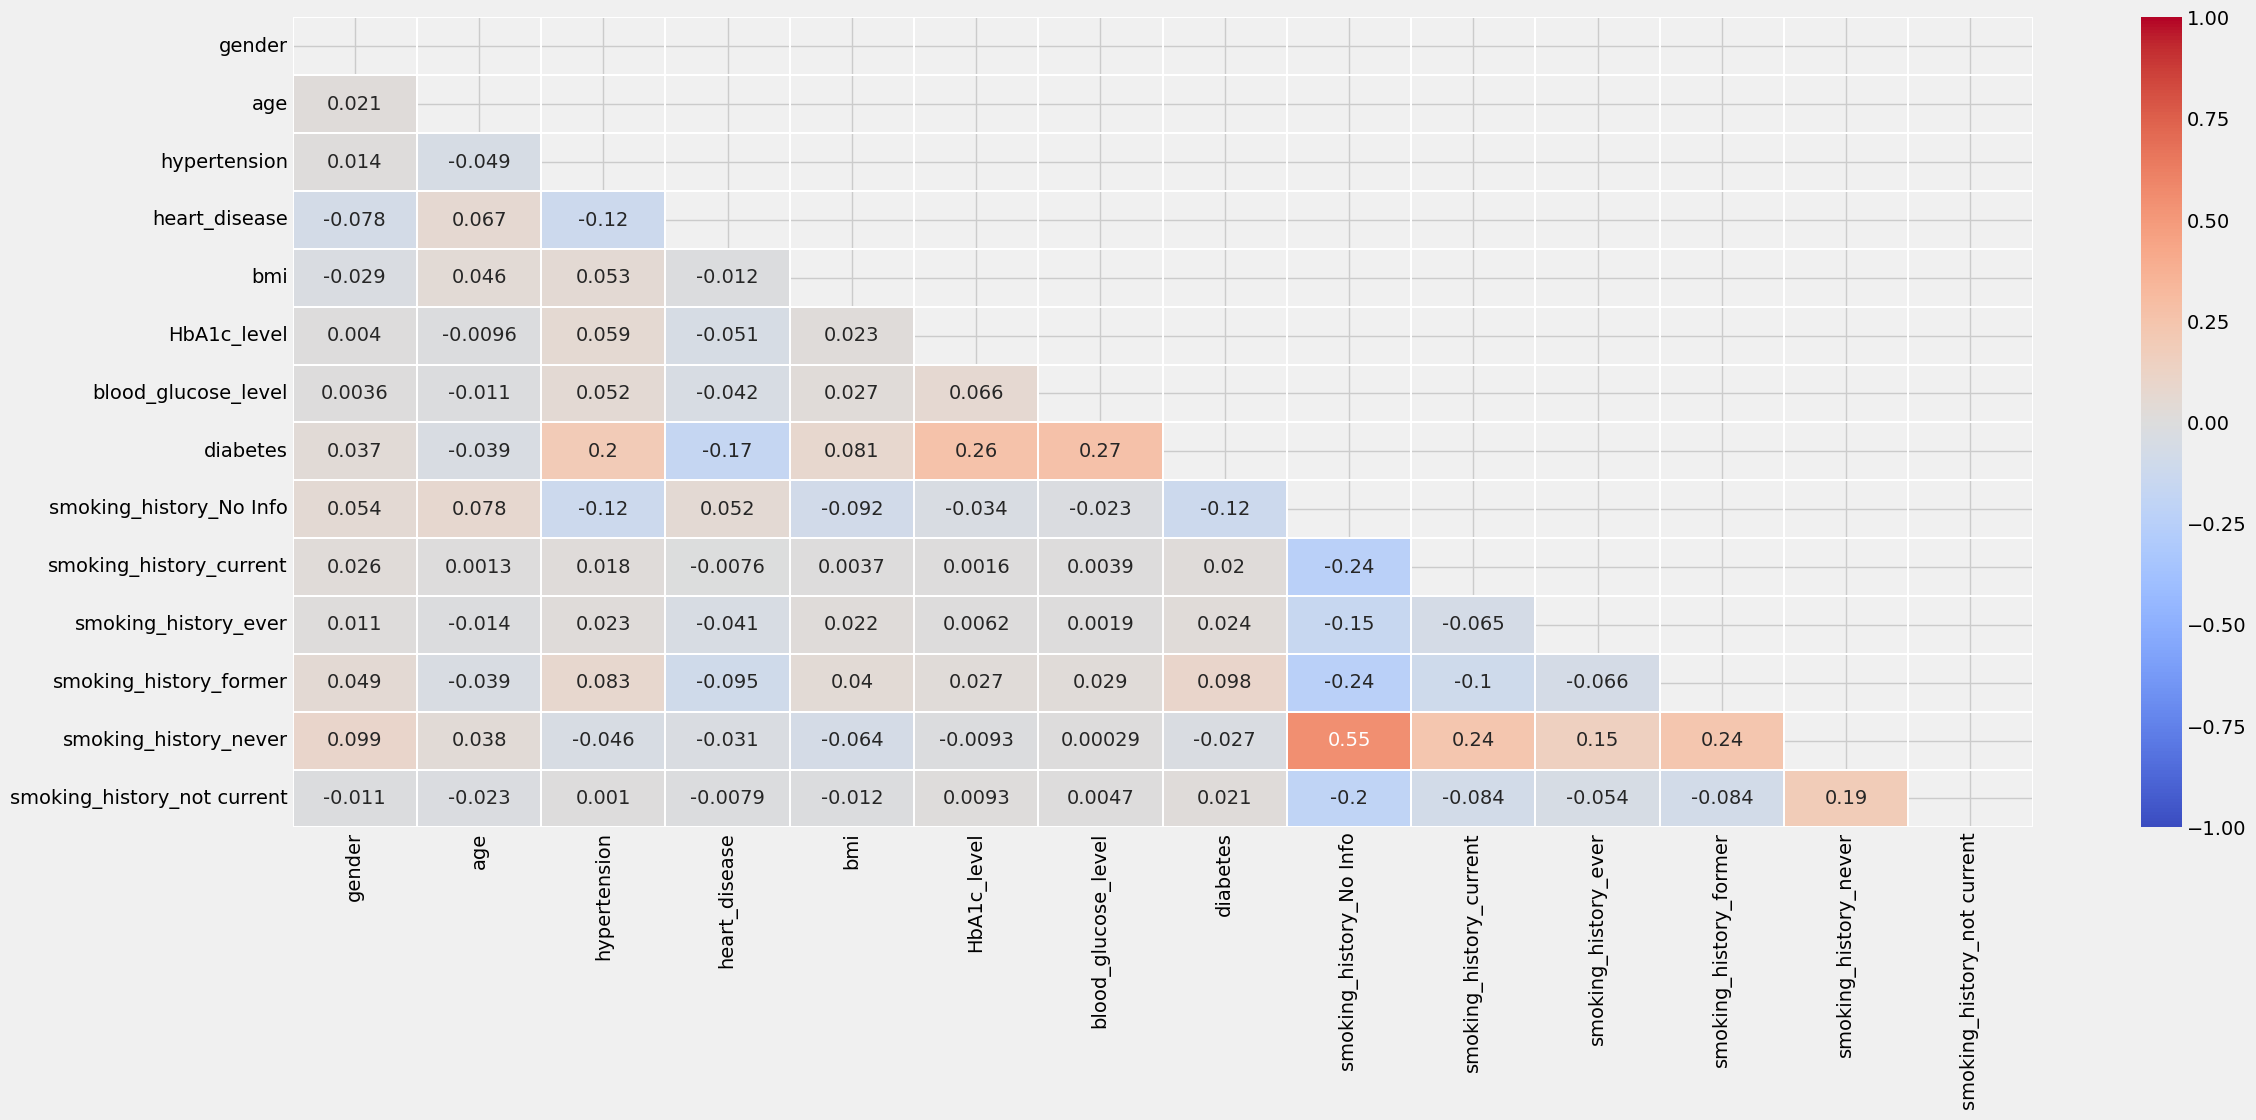

In [49]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(25, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

- Diabetes có sự tương quan tương đối mạnh đối với heart_disease, hypertension, HbA1c_level, blood_glucose_level
- Tương quan thuận đối với  hypertension, HbA1c_level, blood_glucose_level và tương quan nghịch với heart_disease

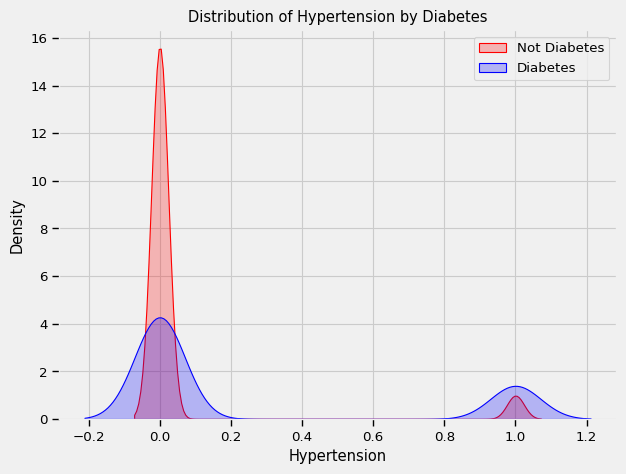

In [52]:
# hypertension
import seaborn as sns

sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.hypertension[(df.diabetes == 0) ], color="Red", shade = True);
ax = sns.kdeplot(df.hypertension[(df.diabetes == 1) ], color="Blue", shade= True);
ax.legend(["Not Diabetes","Diabetes"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Hypertension');
ax.set_title('Distribution of Hypertension by Diabetes');

- Những bệnh nhân không bị huyết áp cao (hypertension = 0) thì tỉ lệ bị bệnh tiểu đường ít hơn gấp 4 lần so với tỉ lệ bị bệnh.
- Những bệnh nhân huyết áp cao thì khả năng bị bệnh tiểu đường khá cao, tỉ lệ bị bệnh gần bằng với tỉ lệ không bị bệnh.

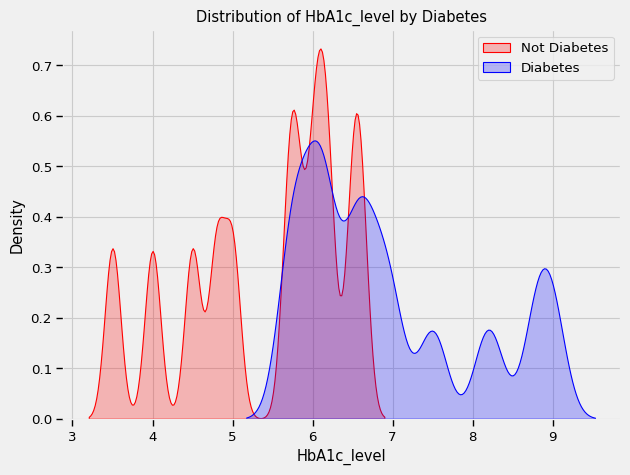

In [53]:
# HbA1c_level
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.HbA1c_level[(df.diabetes == 0) ], color="Red", shade = True);
ax = sns.kdeplot(df.HbA1c_level[(df.diabetes == 1) ], color="Blue", shade= True);
ax.legend(["Not Diabetes","Diabetes"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('HbA1c_level');
ax.set_title('Distribution of HbA1c_level by Diabetes');

- Những bệnh nhân có chỉ số lượng đường trong máu < 5 (HbA1c_level < 5) thì chắc chắn sẽ không bị bệnh tiểu đường.
- Những bệnh nhân có chỉ số lượng đường trong máu > 7 chắc chắn sẽ bị bệnh tiểu đường
- Đối với những bệnh nhân có HbA1c_level từ khoảng 5.2 đến 6.8 thì vẫn sẽ có khả năng bị bệnh, tỉ lệ bệnh gần bằng tỉ lệ không bị bệnh.

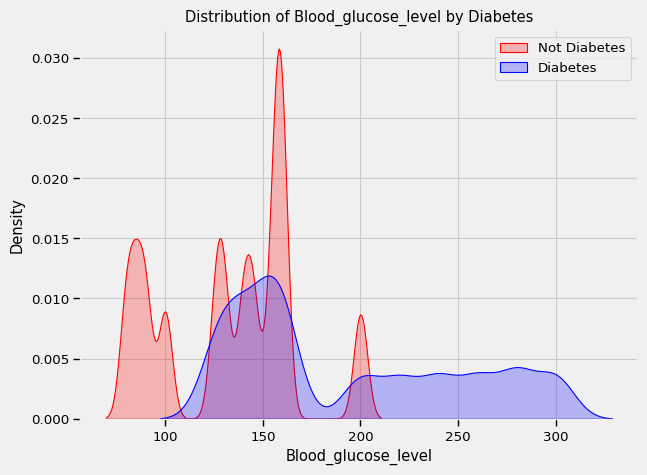

In [54]:
# blood_glucose_level
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.blood_glucose_level[(df.diabetes == 0) ], color="Red", shade = True);
ax = sns.kdeplot(df.blood_glucose_level[(df.diabetes == 1) ], color="Blue", shade= True);
ax.legend(["Not Diabetes","Diabetes"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Blood_glucose_level');
ax.set_title('Distribution of Blood_glucose_level by Diabetes');

- Những bệnh nhân có mức đường huyết thấp, dưới 100 mg/dL thì chắc chắn không bị bệnh tiểu đường
- Những bệnh nhân có mức đường huyết cao, > 200 mg/dL thì khả năng rất cao sẽ mắc bệnh tiểu đường
- Đối với những bệnh nhân có mức đường huyết từ 100 - 200 thì cũng có thể mắc bệnh, nhưng tỉ lệ thấp hơn.

In [55]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes', 'smoking_history_No Info',
       'smoking_history_current', 'smoking_history_ever',
       'smoking_history_former', 'smoking_history_never',
       'smoking_history_not current'],
      dtype='object')

In [56]:
df.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0,80.0,0,1,25.19,6.6,140,0,False,False,False,False,True,False
1,0,54.0,0,0,27.32,6.6,80,0,True,False,False,False,False,False
2,1,28.0,0,0,27.32,5.7,158,0,False,False,False,False,True,False
3,0,36.0,0,0,23.45,5.0,155,0,False,True,False,False,False,False
4,1,76.0,1,1,20.14,4.8,155,0,False,True,False,False,False,False


In [82]:
df1=df.copy()

In [83]:
df1.bmi.unique()

array([25.19, 27.32, 23.45, ..., 59.42, 44.39, 60.52])

In [84]:
bins = [20, 30, 40, 50, 60, 70]
labels = ['20-30', '30-40', '40-50', '50-60', '60-70']
df1.bmi = pd.cut(df1['bmi'], bins=bins, labels=labels, right=False)

In [85]:
df1.age.unique()

array([80.  , 54.  , 28.  , 36.  , 76.  , 20.  , 44.  , 79.  , 42.  ,
       32.  , 53.  , 78.  , 67.  , 15.  , 37.  , 40.  ,  5.  , 69.  ,
       72.  ,  4.  , 30.  , 45.  , 43.  , 50.  , 41.  , 26.  , 34.  ,
       73.  , 77.  , 66.  , 29.  , 60.  , 38.  ,  3.  , 57.  , 74.  ,
       19.  , 46.  , 21.  , 59.  , 27.  , 13.  , 56.  ,  2.  ,  7.  ,
       11.  ,  6.  , 55.  ,  9.  , 62.  , 47.  , 12.  , 68.  , 75.  ,
       22.  , 58.  , 18.  , 24.  , 17.  , 25.  ,  0.08, 33.  , 16.  ,
       61.  , 31.  ,  8.  , 49.  , 39.  , 65.  , 14.  , 70.  ,  0.56,
       48.  , 51.  , 71.  ,  0.88, 64.  , 63.  , 52.  ,  0.16, 10.  ,
       35.  , 23.  ,  0.64,  1.16,  1.64,  0.72,  1.88,  1.32,  0.8 ,
        1.24,  1.  ,  1.8 ,  0.48,  1.56,  1.08,  0.24,  1.4 ,  0.4 ,
        0.32,  1.72,  1.48])

In [86]:
bins = [0, 20, 40, 60, 81]
labels = ['0-20', '20-40', '40-60', '60-80']
df1.age = pd.cut(df1.age, bins = bins, labels = labels, right=False)

In [87]:
df1.HbA1c_level.unique()

array([6.6, 5.7, 5. , 4.8, 6.5, 6.1, 6. , 5.8, 3.5, 6.2, 4. , 4.5, 9. ,
       7. , 8.8, 8.2, 7.5, 6.8])

In [88]:
bins = [4, 5, 6, 7, 8, 9]
labels = ['4-5', '5-6', '6-7', '7-8', '8-9']
df1.HbA1c_level = pd.cut(df1.HbA1c_level, bins=bins, labels=labels, right=False)

In [89]:
df1.blood_glucose_level.unique()

array([140,  80, 158, 155,  85, 200, 145, 100, 130, 160, 126, 159,  90,
       260, 220, 300, 280, 240], dtype=int64)

In [90]:
bins = [50, 100, 150, 200, 250, 300]
labels = ['50-100', '100-150', '150-200', '200-250', '250-300']
df1.blood_glucose_level = pd.cut(df1.blood_glucose_level, bins=bins, labels=labels, right=False)

In [91]:
df1.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0,60-80,0,1,20-30,6-7,100-150,0,False,False,False,False,True,False
1,0,40-60,0,0,20-30,6-7,50-100,0,True,False,False,False,False,False
2,1,20-40,0,0,20-30,5-6,150-200,0,False,False,False,False,True,False
3,0,20-40,0,0,20-30,5-6,150-200,0,False,True,False,False,False,False
4,1,60-80,1,1,20-30,4-5,150-200,0,False,True,False,False,False,False


In [92]:
df1.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes', 'smoking_history_No Info',
       'smoking_history_current', 'smoking_history_ever',
       'smoking_history_former', 'smoking_history_never',
       'smoking_history_not current'],
      dtype='object')

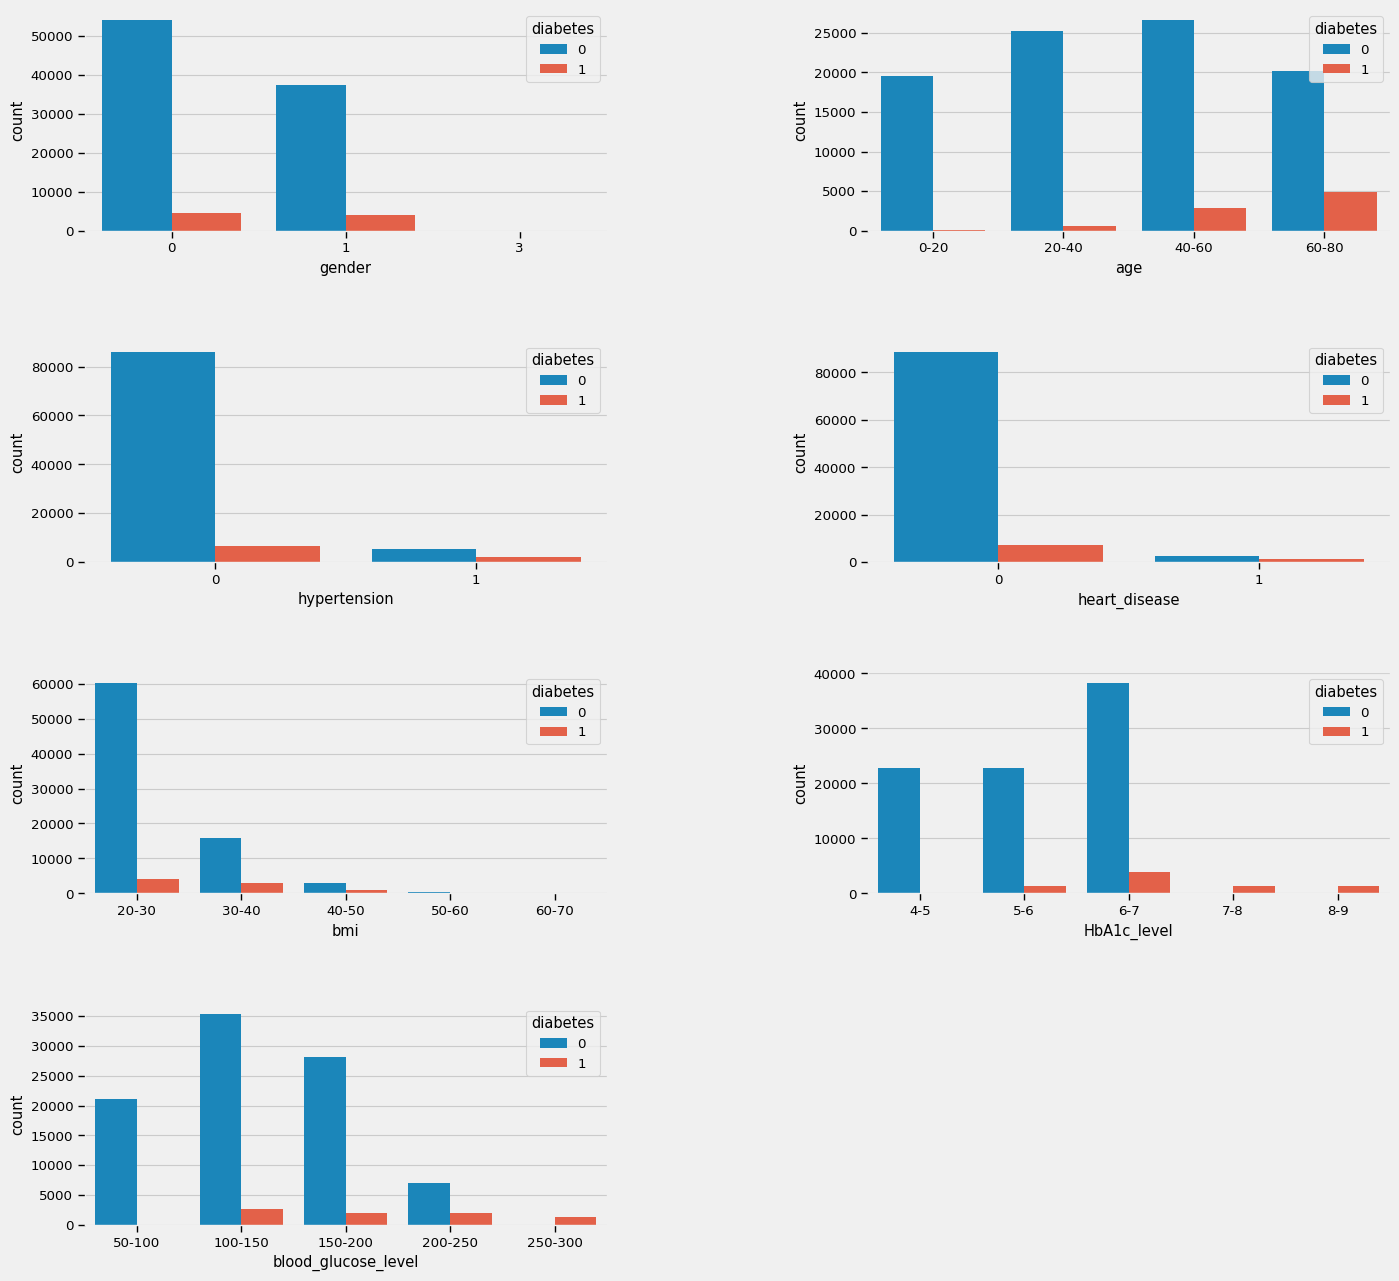

In [94]:
columns = ['gender', 'age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']
plt.figure(1, figsize = (15, 15))
n = 0
for col in columns:
    n += 1
    plt.subplot(4, 2, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.countplot(data=df1, x=col, hue='diabetes')
plt.show()

<Axes: xlabel='smoking_history', ylabel='count'>

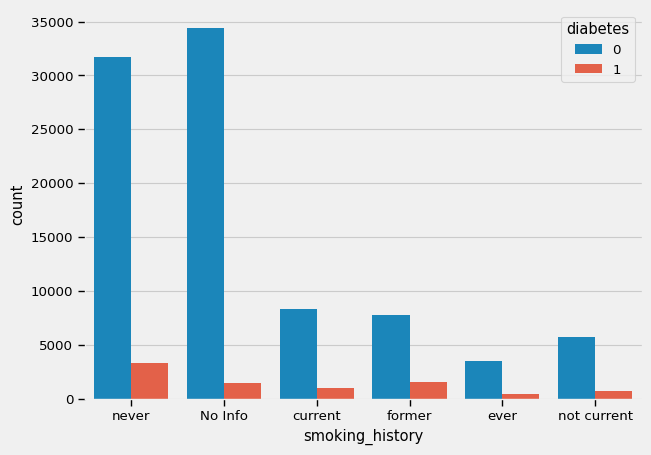

In [128]:
df_original = pd.read_csv('diabetes_prediction_dataset.csv')
sns.countplot(data=df_original, x='smoking_history', hue='diabetes')

- Nhóm bệnh nhân có độ tuổi > 40 thì khả năng mắc bệnh tiểu đường của họ khá cao.
- Những bệnh nhân có vấn đề về huyết áp, tim mạch thì khả năng mắc bệnh cao hơn hẳn so với nhóm còn lại.
- Những bệnh nhân béo phì cấp độ 2, cấp độ 3 (bmi > 30) sẽ làm tăng khả năng mắc bệnh tiểu đường.
- Các chỉ số HbA1c_level và blood_glucose_level tỉ lệ thuận với tỉ lệ mắc bệnh tiểu đường của bệnh nhân.
- Nhóm bệnh nhân hiện tại hoặc trước đó đã từng hút thuốc lá sẽ tăng nguy cơ mắc bệnh tiểu đường.
- Nhóm bệnh nhân nam có nguy cơ mắc bệnh cao hơn nhóm bệnh nhân nữ.

<Axes: xlabel='diabetes'>

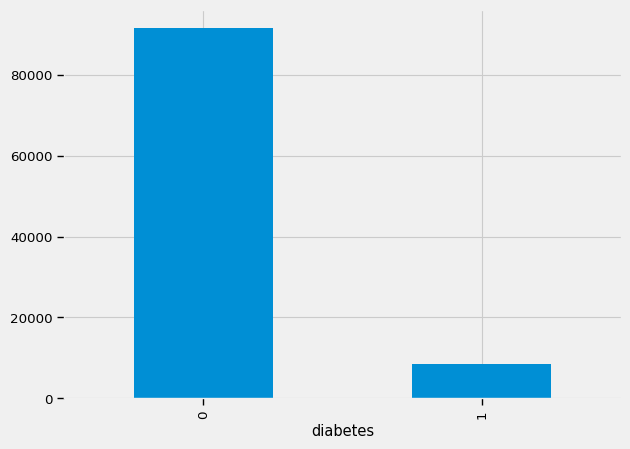

In [129]:
df.diabetes.value_counts().plot.bar()

## Chia train, test

In [95]:
X = df.drop(columns=['diabetes'])
y = df.diabetes

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Huấn luyện mô hình

In [97]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [98]:

        models = [
            LogisticRegression(),
            DecisionTreeClassifier(),
            GaussianNB(),
            GridSearchCV(RandomForestClassifier(), param_grid={
                'n_estimators': [10 ,50, 100, 200],
            }),
            GridSearchCV(KNeighborsClassifier(), param_grid={
                'n_neighbors': [10 ,50, 100, 200],
            }),
            GridSearchCV(AdaBoostClassifier(), param_grid={
                'n_estimators': [10 ,50, 100, 200],
            }),
            GridSearchCV(GradientBoostingClassifier(), param_grid={
                'n_estimators': [10 ,50, 100, 200],
            }),
            GridSearchCV(XGBClassifier(), param_grid={
                'n_estimators': [10 ,50, 100, 200],
            }),
        ]



In [99]:
for model in models:
    _model = model
    _model.fit(X_train, y_train)
    pred = _model.predict(X_test)
    print('='*50)
    print(_model)
    try:
        print(f"BEST PARAM: {_model.best_params_}")
    except:
        pass
    print(classification_report(y_test, pred))
    print('='*50)

LogisticRegression()
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     18292
           1       0.87      0.54      0.67      1708

    accuracy                           0.95     20000
   macro avg       0.92      0.77      0.82     20000
weighted avg       0.95      0.95      0.95     20000

DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     18292
           1       0.72      0.73      0.73      1708

    accuracy                           0.95     20000
   macro avg       0.85      0.85      0.85     20000
weighted avg       0.95      0.95      0.95     20000

GaussianNB()
              precision    recall  f1-score   support

           0       0.97      0.93      0.95     18292
           1       0.46      0.65      0.54      1708

    accuracy                           0.90     20000
   macro avg       0.71      0.79      0.74     20000
weighted avg   

### Nhận xét:
Dựa vào giá trị precision, recall trên lớp 0, 1 và accuracy.
=> Mô hình được sử dụng cho việc dự đoán những bệnh nhân có khả năng mắc bệnh tiểu đường là AdaBoost, GradientBoosting

# OverSampling

In [108]:
X_train.shape

(80000, 13)

In [109]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [110]:
y_train.value_counts()

diabetes
0    73208
1    73208
Name: count, dtype: int64

In [111]:
for model in models:
    _model = model
    _model.fit(X_train, y_train)
    pred = _model.predict(X_test)
    print('='*50)
    print(_model)
    try:
        print(f"BEST PARAM: {_model.best_params_}")
    except:
        pass
    print(classification_report(y_test, pred))
    print('='*50)

LogisticRegression()
              precision    recall  f1-score   support

           0       0.98      0.94      0.96     18292
           1       0.55      0.75      0.64      1708

    accuracy                           0.93     20000
   macro avg       0.77      0.85      0.80     20000
weighted avg       0.94      0.93      0.93     20000

DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     18292
           1       0.69      0.74      0.72      1708

    accuracy                           0.95     20000
   macro avg       0.83      0.86      0.84     20000
weighted avg       0.95      0.95      0.95     20000

GaussianNB()
              precision    recall  f1-score   support

           0       0.98      0.84      0.91     18292
           1       0.32      0.82      0.46      1708

    accuracy                           0.84     20000
   macro avg       0.65      0.83      0.68     20000
weighted avg   

- Dựa vào các chỉ số đánh giá độ chính xác trên lớp 0,1 => XGBoost, AdaBoost

# UnderSampling

In [144]:
from sklearn.utils import resample
diabetes_0 = df[df.diabetes == 0]
diabetes_1 = df[df.diabetes == 1]

diabetes_0_undersampled = resample(diabetes_0,
                              replace=True,     
                              n_samples=len(diabetes_1), 
                              random_state=42)

df_undersampled = pd.concat([diabetes_1, diabetes_0_undersampled])
df_undersampled.shape

(17000, 14)

In [145]:
X = df_undersampled.drop(columns=['diabetes'])
y = df_undersampled.diabetes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [123]:
for model in models:
    _model = model
    _model.fit(X_train, y_train)
    pred = _model.predict(X_test)
    print('='*50)
    print(_model)
    try:
        print(f"BEST PARAM: {_model.best_params_}")
    except:
        pass
    print(classification_report(y_test, pred))
    print('='*50)

LogisticRegression()
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1713
           1       0.87      0.87      0.87      1687

    accuracy                           0.87      3400
   macro avg       0.87      0.87      0.87      3400
weighted avg       0.87      0.87      0.87      3400

DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1713
           1       0.88      0.88      0.88      1687

    accuracy                           0.88      3400
   macro avg       0.88      0.88      0.88      3400
weighted avg       0.88      0.88      0.88      3400

GaussianNB()
              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1713
           1       0.84      0.80      0.82      1687

    accuracy                           0.83      3400
   macro avg       0.83      0.83      0.83      3400
weighted avg   

- Có sự cải thiện rõ rệt về các chỉ số Precision, Recall, F1-Score trên lớp 1, nhưng accuracy không cao bằng so với bộ dữ liệu trước khi UnderSampling.

# MinMaxScaler trên dataset đã UnderSampling

In [124]:
df_undersampled.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
6,0,44.0,0,0,19.31,6.5,200,1,False,False,False,False,True,False
26,1,67.0,0,1,27.32,6.5,200,1,False,False,False,False,False,True
38,1,50.0,1,0,27.32,5.7,260,1,False,True,False,False,False,False
40,1,73.0,0,0,25.91,9.0,160,1,False,False,False,True,False,False
53,0,53.0,0,0,27.32,7.0,159,1,False,False,False,True,False,False


In [126]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler_data = scaler.fit_transform(df_undersampled)
df_scaled = pd.DataFrame(scaler_data, columns=df.columns)
df_scaled.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0.0,0.549550,0.0,0.0,0.115850,0.545455,0.545455,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.837337,0.0,1.0,0.217823,0.545455,0.545455,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.624625,1.0,0.0,0.217823,0.400000,0.818182,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.912412,0.0,0.0,0.199873,1.000000,0.363636,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.662162,0.0,0.0,0.217823,0.636364,0.359091,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [127]:
X = df_scaled.drop(columns=['diabetes'])
y = df_scaled.diabetes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

for model in models:
    _model = model
    _model.fit(X_train, y_train)
    pred = _model.predict(X_test)
    print('='*50)
    print(_model)
    try:
        print(f"BEST PARAM: {_model.best_params_}")
    except:
        pass
    print(classification_report(y_test, pred))
    print('='*50)

LogisticRegression()
              precision    recall  f1-score   support

         0.0       0.89      0.88      0.88      1713
         1.0       0.88      0.88      0.88      1687

    accuracy                           0.88      3400
   macro avg       0.88      0.88      0.88      3400
weighted avg       0.88      0.88      0.88      3400

DecisionTreeClassifier()
              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88      1713
         1.0       0.88      0.88      0.88      1687

    accuracy                           0.88      3400
   macro avg       0.88      0.88      0.88      3400
weighted avg       0.88      0.88      0.88      3400

GaussianNB()
              precision    recall  f1-score   support

         0.0       0.81      0.85      0.83      1713
         1.0       0.84      0.80      0.82      1687

    accuracy                           0.83      3400
   macro avg       0.83      0.83      0.83      3400
weighted avg   

- XGBoost, AdaBoost, GradientBoosting

In [154]:
# from sklearn.model_selection import GridSearchCV, cross_val_score

# # Define models and parameters for GridSearchCV
# models = [
#     LogisticRegression(),
#     DecisionTreeClassifier(),
#     GridSearchCV(RandomForestClassifier(), param_grid={
#         'n_estimators': [10, 50, 100, 200],
#     }, cv=5),
#     GridSearchCV(KNeighborsClassifier(), param_grid={
#         'n_neighbors': [10, 50, 100, 200],
#     }, cv=5),
#     GridSearchCV(AdaBoostClassifier(), param_grid={
#         'n_estimators': [10, 50, 100, 200],
#     }, cv=5),
#     GridSearchCV(GradientBoostingClassifier(), param_grid={
#         'n_estimators': [10, 50, 100, 200],
#     }, cv=5),
#     GridSearchCV(XGBClassifier(), param_grid={
#         'n_estimators': [10, 50, 100, 200],
#     }, cv=5),
# ]

# # Iterate through each model and evaluate using k-fold cross-validation
# for model in models:
#     _model = model
#     # Perform cross-validation
#     scores = cross_val_score(_model, X_train, y_train, cv=5)
#     print('='*50)
#     print(_model)
#     print(f"CV Mean Accuracy: {np.mean(scores):.4f}")
#     print(f"CV Standard Deviation: {np.std(scores):.4f}")

#     _model.fit(X_train, y_train)
#     pred = _model.predict(X_test)
#     try:
#         print(f"BEST PARAM: {_model.best_params_}")
#     except AttributeError:
#         pass
    
#     # Print classification report
#     print(classification_report(y_test, pred))
#     print('='*50)


LogisticRegression()
CV Mean Accuracy: 0.8809
CV Standard Deviation: 0.0040
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1713
           1       0.87      0.87      0.87      1687

    accuracy                           0.87      3400
   macro avg       0.87      0.87      0.87      3400
weighted avg       0.87      0.87      0.87      3400

DecisionTreeClassifier()
CV Mean Accuracy: 0.8824
CV Standard Deviation: 0.0066
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1713
           1       0.88      0.88      0.88      1687

    accuracy                           0.88      3400
   macro avg       0.88      0.88      0.88      3400
weighted avg       0.88      0.88      0.88      3400

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [10, 50, 100, 200]})
CV Mean Accuracy: 0.9057
CV Standard Deviation: 0.0014
BEST PARAM: {'n_es